<a href="https://colab.research.google.com/github/bchaoss/Numerical-Optimization/blob/main/Code/01Select_stepSize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Importance of Suitable Step Size

The basic methods for optimization are mostly iterative algorithms. Two key steps in these algorithms aare determining the **descent direction** and the descent **step size**. We will illustrate the importance of choosing the descent step size using the following simple optimization problem of one-dimensional search.

Consider the following univariate quadratic function. It is clear that its minimum point is $x^* = 0$.

$$min{ f(x) }= x^2$$

We choose the initial point as $x_0 = 2$, using the following two directions $α_k$ and step sizes $d_k$:
- direction: $(-1)^k$ &emsp; step size: $2 + \frac{2k+1}{k(k+1)}$
- direction: $-1$  &emsp; step size: $\frac{1}{k(k+1)}$

Note that both sets of step sizes and directions satisfy the condition $f(x_k + α_k d_k) < f(x_k)$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# our objective function
def f(x):
    return x ** 2

x = np.linspace(-2, 2, 100)
y = f(x)

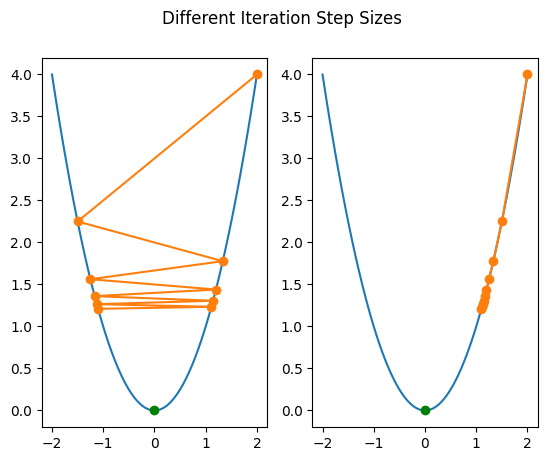

In [15]:
fig = plt.figure()
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.plot(x, y)
ax2.plot(x, y)

# method 1
x1 = np.empty((1, 11))
x1[:, 1] = 2  # x1 =（2，4）
for k in range(1, 10):
    a1 = ((2 * k + 1) / ((k + 1) * k)) + 2  # step size 1
    d1 = pow(-1, k)  # direction 1
    x1[:, k+1] = x1[:, k] + a1 * d1

x1 = np.delete(x1, 0)
y1 = f(x1)
ax1.plot(x1, y1,'o-')
ax1.plot(0, 0, 'go')  # Optimal point


# method 2
x2 = np.empty((1, 11))
x2[:, 1] = 2
for k in range(1, 10):
    a2 = 1 / ((k + 1) * k)  # step size 1
    d2 = -1  # direction 1
    x2[:, k+1] = x2[:, k] + a2 * d2

x2 = np.delete(x2, 0)
y2 = f(x2)
ax2.plot(x2, y2,'o-')
ax2.plot(0, 0, 'go')

fig.suptitle("Different Iteration Step Sizes")
plt.show()

From the figure, we can observe that the descent values of method 1 are relatively small compared to the chosen step size, while the step size and descent values of method 2 are both too small.

This suggests that our original condition $f(x_k + α_k d_k) < f(x_k)$ is not sufficient. We will develop some line search criteria to help us find suitable step lengths. These criteria include the Armijo conditions, Goldstein conditions, Wolfe conditions, etc.